In [ ]:
# ============================================================
# Author: Tarek Ismail
# Project: Car Price Data Analysis
# Description:
#   This project performs data analysis on car prices based on
#   features such as model year, transmission type, fuel type,
#   and other relevant factors.
#
# Task: Final Project (Task 2)
# ============================================================

# Data Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars_data = pd.read_csv('cars.csv')
cars_data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [12]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4942 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4954 non-null   float64
 6   fuelType      4943 non-null   object 
 7   tax           4960 non-null   int64  
 8   mpg           4948 non-null   float64
 9   engineSize    4952 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


In [12]:
cars_data.isnull().sum()

carID            0
brand           18
model            0
year             0
transmission     0
mileage          6
fuelType        17
tax              0
mpg             12
engineSize       8
price            0
dtype: int64

In [14]:
cars_data.duplicated().sum()

0

In [14]:
cars_data['brand'].unique()

array(['hyundi', 'vauxhall', 'audi', 'vw', 'skoda', 'merc', 'toyota',
       'bmw', 'ford', nan], dtype=object)

In [16]:
cars_data['transmission'].value_counts()

transmission
Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: count, dtype: int64

In [3]:
cars_data = cars_data[cars_data['transmission'] != 'Other']

In [7]:
cars_data['transmission'].value_counts()

transmission
Manual       1948
Automatic    1660
Semi-Auto    1351
Name: count, dtype: int64

In [50]:
cars_data['fuelType'].value_counts()

fuelType
Diesel      2981
Petrol      1746
Hybrid       187
Other         26
Electric       2
Name: count, dtype: int64

In [22]:
cars_data['brand'].value_counts()

brand
merc        789
vw          765
ford        765
bmw         635
hyundi      507
toyota      446
skoda       420
audi        342
vauxhall    272
Name: count, dtype: int64

In [10]:
missing_percentage = cars_data.isnull().mean() * 100
print(missing_percentage)

carID           0.000000
brand           0.362976
model           0.000000
year            0.000000
transmission    0.000000
mileage         0.120992
fuelType        0.342811
tax             0.000000
mpg             0.241984
engineSize      0.161323
price           0.000000
dtype: float64


In [25]:
# we will drop this null values because its prcintage is so small and not efffected on that data

In [7]:
cars_data_cleaned = cars_data.dropna()
cars_data_cleaned = cars_data.dropna(subset=['brand', 'fuelType', 'mileage', 'mpg', 'engineSize'])

In [11]:
cars_data_cleaned.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [13]:
cars_data_cleaned.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000
mean,15833.729537,2016.747704,24911.383139,152.054501,50.305756,2.123617,23497.286181
std,2205.987286,2.871558,24490.782216,81.865620,35.340319,0.784985,16400.467429
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13923.500000,2016.000000,5591.000000,145.000000,38.700000,1.600000,12000.000000
50%,15842.000000,2017.000000,18887.000000,145.000000,47.100000,2.000000,18999.000000
75%,17766.500000,2019.000000,36539.500000,150.000000,54.300000,2.800000,30496.500000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [15]:
cars_data_cleaned.describe(include = 'object')

,brand,model,transmission,fuelType
count,4899,4899,4899,4899
unique,9,90,3,5
top,merc,Arteon,Manual,Diesel
freq,783,165,1917,2958


# Data Visualization¶

# Average Car Price Based on Year of Production

In [9]:
price_by_year = cars_data_cleaned.groupby('year')['price'].mean().reset_index().sort_values(by='year', ascending=False)
price_by_year.head()

,year,price
23,2020,37001.095808
22,2019,34784.410104
21,2018,26448.142045
20,2017,19501.037221
19,2016,17182.683060


C:\Users\Tarek E.Shabana\AppData\Local\Temp\ipykernel_11188\1830390503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


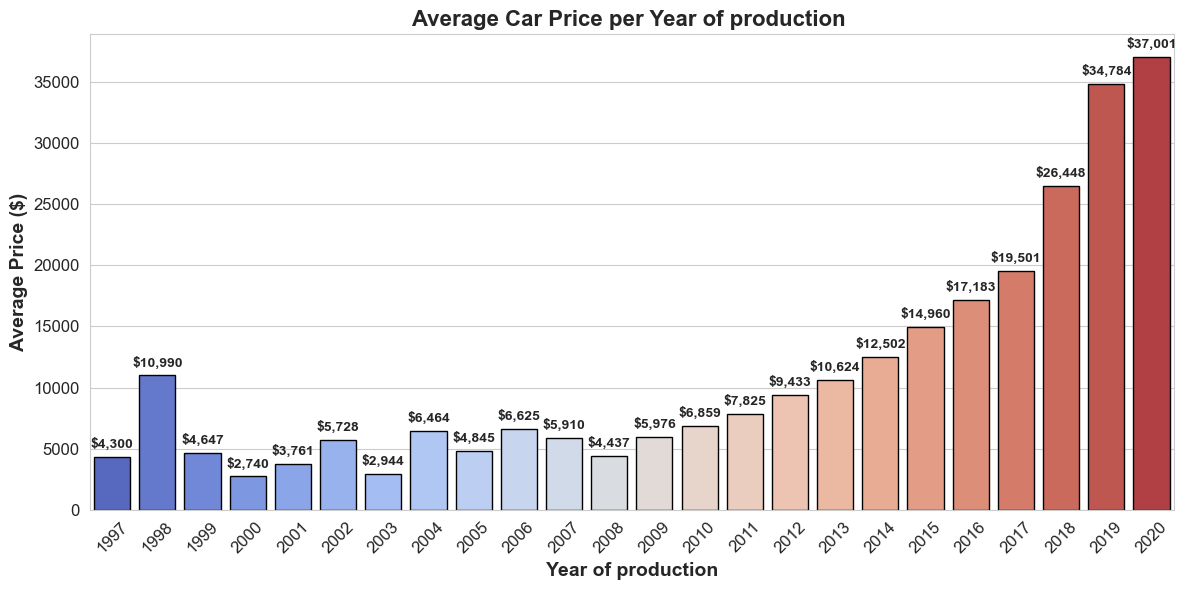

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=price_by_year,
    x='year',
    y='price',
    palette="coolwarm",  
    edgecolor="black"
)
plt.xlabel("Year of production", fontsize=14, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold') 
plt.title("Average Car Price per Year of production ", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',  
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# Average Car Price depend on brand

In [21]:
price_by_prand = cars_data_cleaned.groupby('brand')['price'].mean().reset_index().sort_values(by='brand', ascending=False)
price_by_prand

,brand,price
8,vw,21768.121372
7,vauxhall,11903.614815
6,toyota,18794.629545
5,skoda,13869.863636
4,merc,30376.938697
3,hyundi,14652.894212
2,ford,15932.646904
1,bmw,37681.522979
0,audi,42210.555882


C:\Users\Tarek E.Shabana\AppData\Local\Temp\ipykernel_7588\526529601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


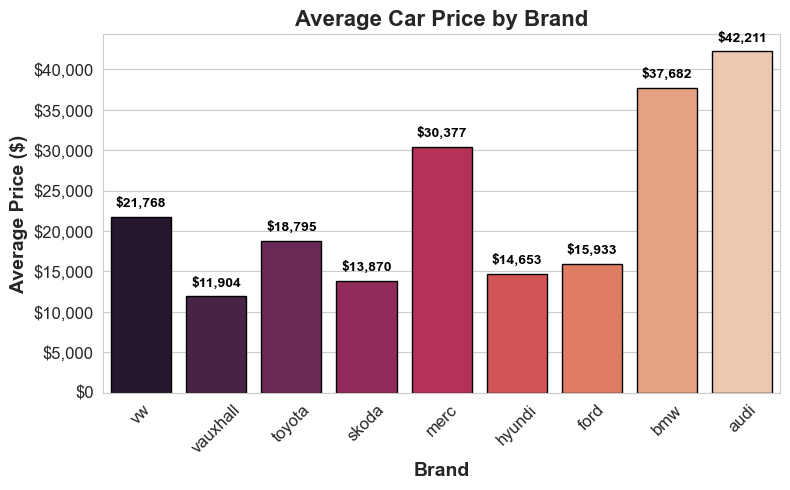

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=price_by_prand,
    x='brand',
    y='price',
    palette="rocket",  
    edgecolor="black"
)
plt.xlabel("Brand", fontsize=14, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold')
plt.title("Average Car Price by Brand", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

def price_formatter(x, pos):
    return f'${int(x):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(price_formatter))

for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',  
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom',  
                     xytext=(0, 5),  
                     textcoords='offset points',
                     fontsize=10, fontweight='bold', color='black')  
plt.tight_layout()
plt.show()

# Price Comparison of Models by Brand

In [37]:
model_price = cars_data_cleaned.groupby(['brand','model'])['price'].mean().reset_index().sort_values(by='brand', ascending=False)
model_price

,brand,model,price
89,vw,Tiguan Allspace,28699.475410
82,vw,Caddy Maxi Life,19193.583333
76,vw,Amarok,28194.513514
77,vw,Arteon,26455.309091
79,vw,CC,10439.189655
...,...,...,...
8,audi,S3,17762.777778
9,audi,S4,32913.200000
10,audi,SQ5,33052.916667
11,audi,SQ7,50368.666667


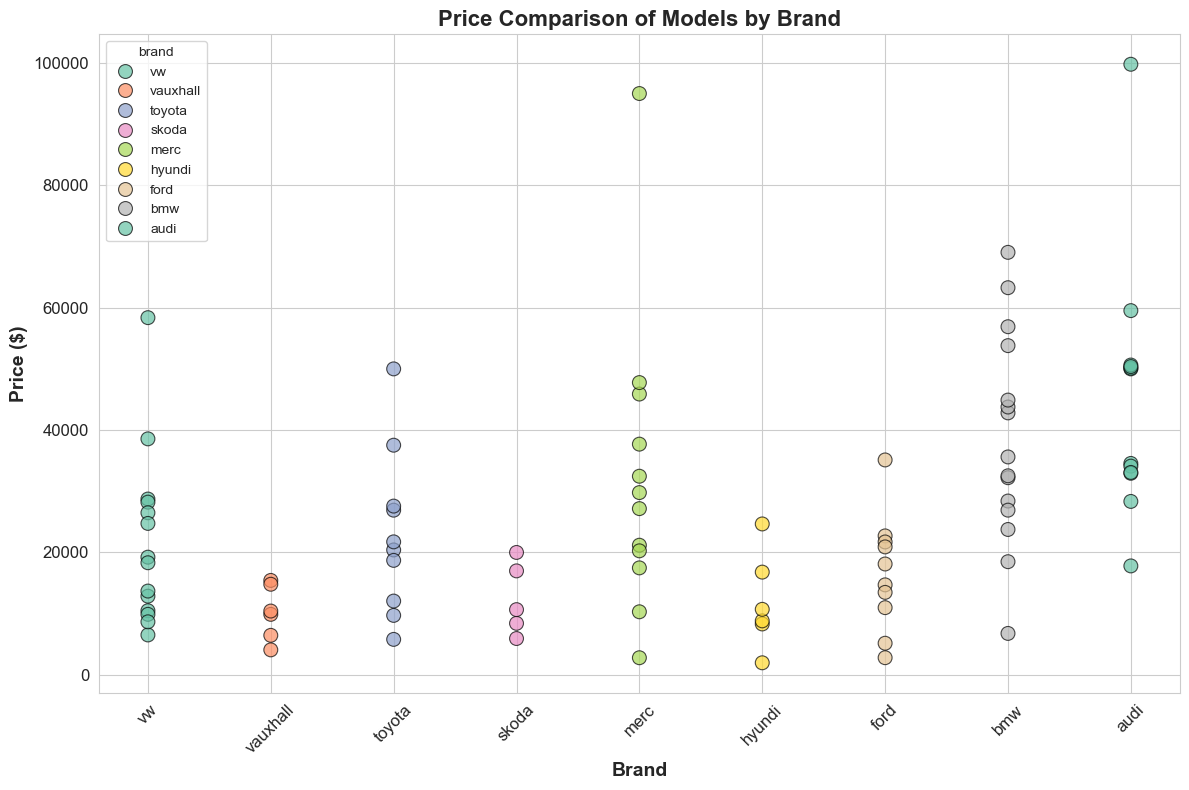

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=model_price, 
    x='brand', 
    y='price', 
    hue='brand', 
    palette='Set2',  
    s=100,  
    alpha=0.7,  
    edgecolor="black" 
)
plt.xlabel("Brand", fontsize=14, fontweight='bold')
plt.ylabel("Price ($)", fontsize=14, fontweight='bold')
plt.title("Price Comparison of Models by Brand", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Average Car Price depend on Engine Size

In [38]:
price_by_engine_size = cars_data_cleaned.groupby('engineSize')['price'].mean().reset_index().sort_values(by='engineSize', ascending=False)
price_by_engine_size.head()

,engineSize,price
35,6.6,57000.000000
34,6.0,49970.000000
33,5.5,50600.090909
32,5.2,111652.941176
31,5.0,34106.200000


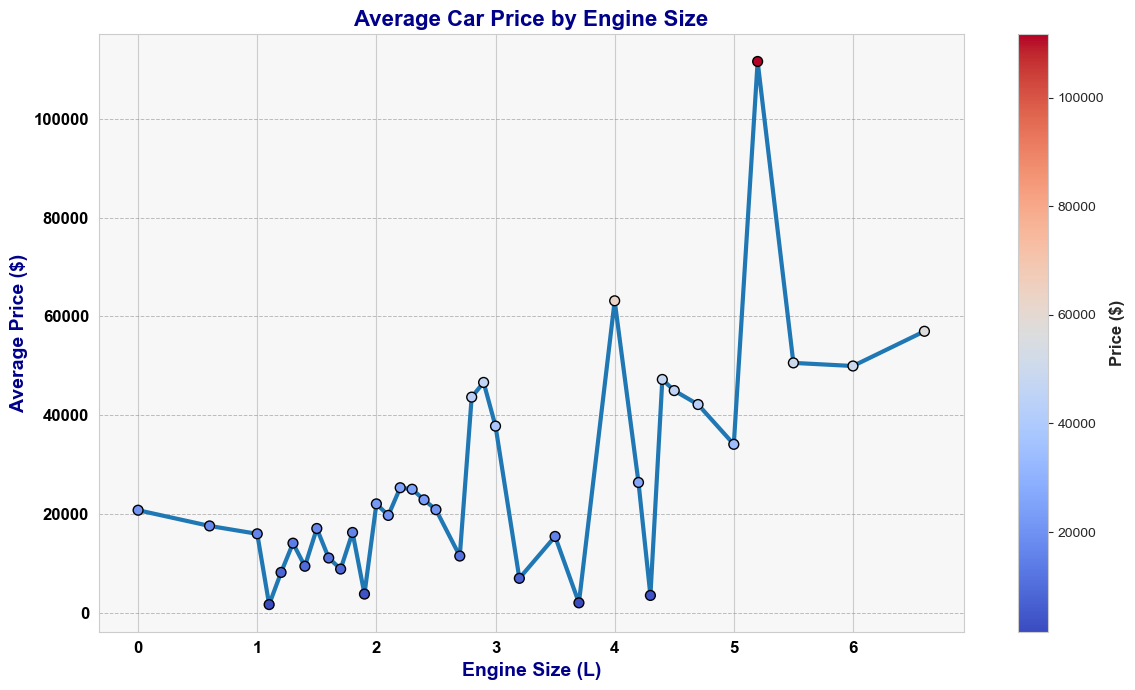

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
norm = plt.Normalize(price_by_engine_size['price'].min(), price_by_engine_size['price'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

lineplot = sns.lineplot(
    data=price_by_engine_size, 
    x='engineSize', 
    y='price', 
    marker='o',  
    linewidth=3,  
    zorder=1  
)
scatter = plt.scatter(
    price_by_engine_size['engineSize'], 
    price_by_engine_size['price'], 
    c=price_by_engine_size['price'], 
    cmap="coolwarm", 
    s=50,  
    edgecolor='black',  
    zorder=2  
)
plt.gca().patch.set_facecolor('#f7f7f7')
plt.xlabel("Engine Size (L)", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Average Car Price by Engine Size", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
cbar = plt.colorbar(scatter)  
cbar.set_label('Price ($)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

# Average Fuel Efficiency(MPG) by Fuel Type

In [36]:
mpg_and_fuelType = cars_data_cleaned.groupby('fuelType')['mpg'].mean().reset_index().sort_values(by='fuelType', ascending=False)
mpg_and_fuelType

,fuelType,mpg
4,Petrol,42.510873
3,Other,177.123077
2,Hybrid,133.321739
1,Electric,470.800000
0,Diesel,48.299053


C:\Users\Tarek E.Shabana\AppData\Local\Temp\ipykernel_1936\4276346216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


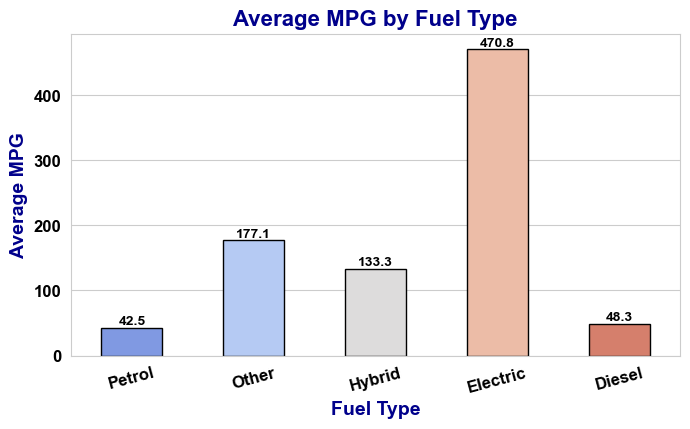

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
barplot = sns.barplot(
    data=mpg_and_fuelType,
    x='fuelType',
    y='mpg',
    palette="coolwarm",  
    edgecolor="black",
    width=0.5
)
plt.xlabel("Fuel Type", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Average MPG", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Average MPG by Fuel Type", fontsize=16, fontweight='bold', color='darkblue')

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}',  
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black', rotation=15) 
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.tight_layout()
plt.subplots_adjust(top=0.8) 
plt.show()

# Average Fuel Efficiency(MPG) by Engine Size

In [131]:
mpg_and_engine_size = cars_data_cleaned.groupby('engineSize')['mpg'].mean().reset_index().sort_values(by='engineSize', ascending=False)
mpg_and_engine_size.head()

,engineSize,mpg
35,6.6,22.100000
34,6.0,23.700000
33,5.5,25.254545
32,5.2,22.888235
31,5.0,22.426667


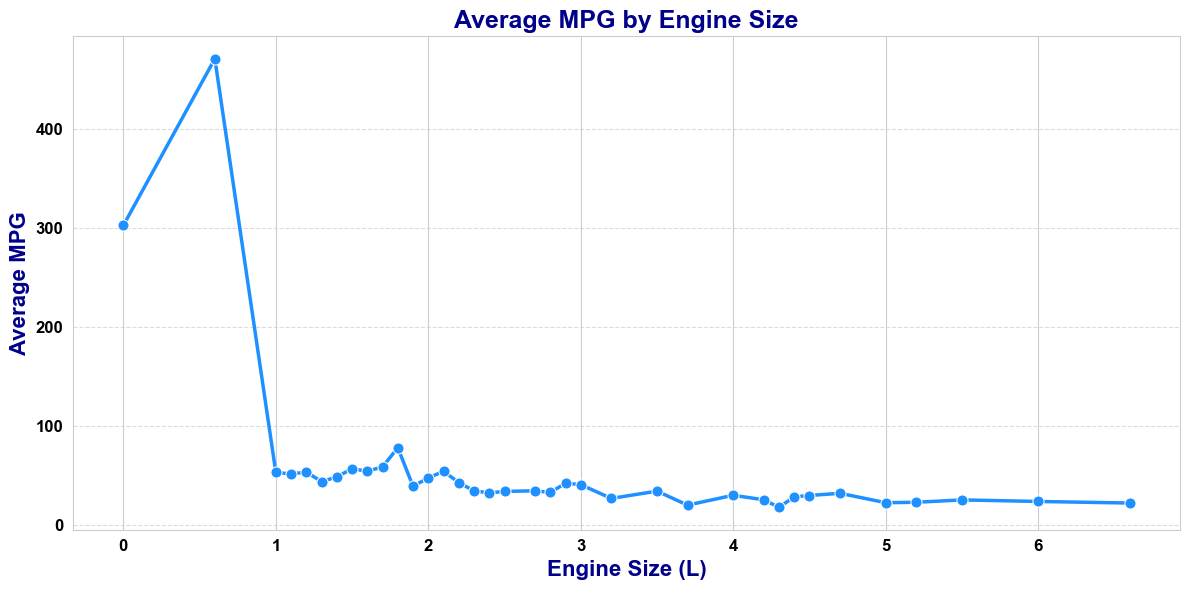

In [117]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(
    data=mpg_and_engine_size,
    x='engineSize',
    y='mpg',
    marker='o',  
    color='dodgerblue',  
    linewidth=2.5,  
    markersize=8,  
    linestyle='-',  
)
plt.xlabel("Engine Size (L)", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Average MPG", fontsize=16, fontweight='bold', color='darkblue')
plt.title("Average MPG by Engine Size", fontsize=18, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # شبكة أفقية فقط
plt.tight_layout()
plt.show()

# Average Fuel Efficiency(MPG) by Transmission Type

In [57]:
mpg_by_transmission = cars_data_cleaned.groupby('transmission')['mpg'].mean().reset_index().sort_values(by='transmission', ascending=False)
mpg_by_transmission

,transmission,mpg
2,Semi-Auto,42.741555
1,Manual,51.731351
0,Automatic,54.799696


C:\Users\Tarek E.Shabana\AppData\Local\Temp\ipykernel_4388\3452614950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


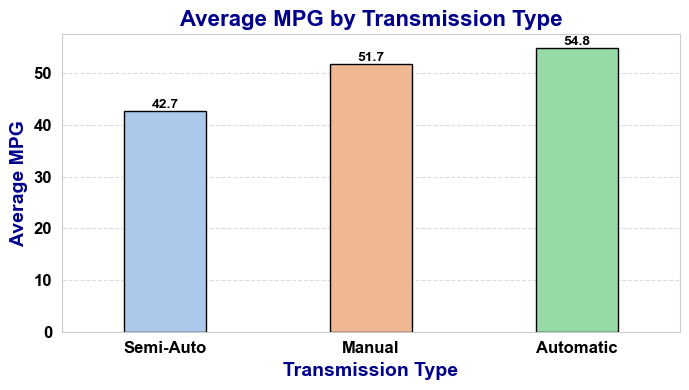

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 4))
barplot = sns.barplot(
    data=mpg_by_transmission,
    x='transmission',
    y='mpg',
    palette="pastel", 
    edgecolor="black",
    linewidth=1,
    width=0.4 
)
plt.xlabel("Transmission Type", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Average MPG", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Average MPG by Transmission Type", fontsize=16, fontweight='bold', color='darkblue')

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

# Average Car Price Based on Year of Production

In [32]:
price_and_year_of_production = cars_data_cleaned.groupby('year')['price'].mean().reset_index().sort_values(by='year', ascending=False)
price_and_year_of_production.head()

,year,price
23,2020,37001.095808
22,2019,34784.410104
21,2018,26448.142045
20,2017,19501.037221
19,2016,17182.683060


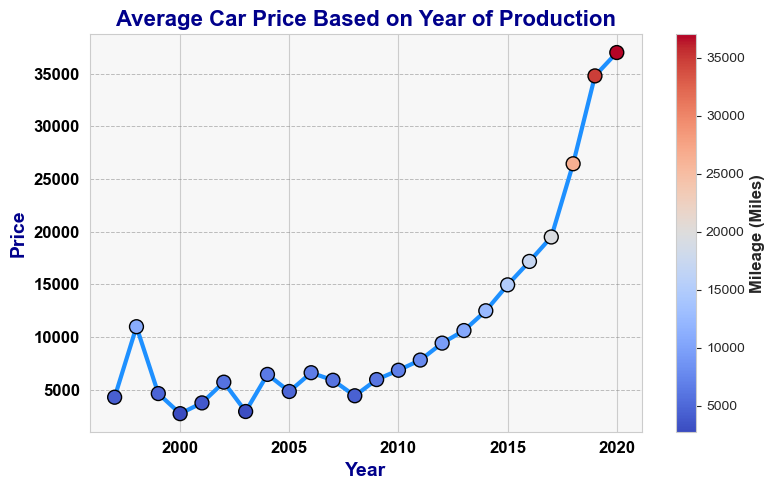

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
lineplot = sns.lineplot(
    data=price_and_year_of_production,
    x='year',
    y='price',
    marker='o',
    linewidth=3,
    color='dodgerblue',
    zorder=1
)
scatter = plt.scatter(
    price_and_year_of_production['year'],
    price_and_year_of_production['price'],
    c=price_and_year_of_production['price'],
    cmap="coolwarm",
    s=100,
    edgecolor='black',
    zorder=2
)
plt.gca().patch.set_facecolor('#f7f7f7')
plt.xlabel("Year", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Average Car Price Based on Year of Production", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Mileage (Miles)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

# Average Car Mileage by Year

In [23]:
mileage_by_year = cars_data_cleaned.groupby('year')['mileage'].mean().reset_index().sort_values(by='year', ascending=False)
mileage_by_year.head() 

,year,mileage
23,2020,1894.000000
22,2019,5435.202080
21,2018,17919.304924
20,2017,25368.834988
19,2016,31724.745902


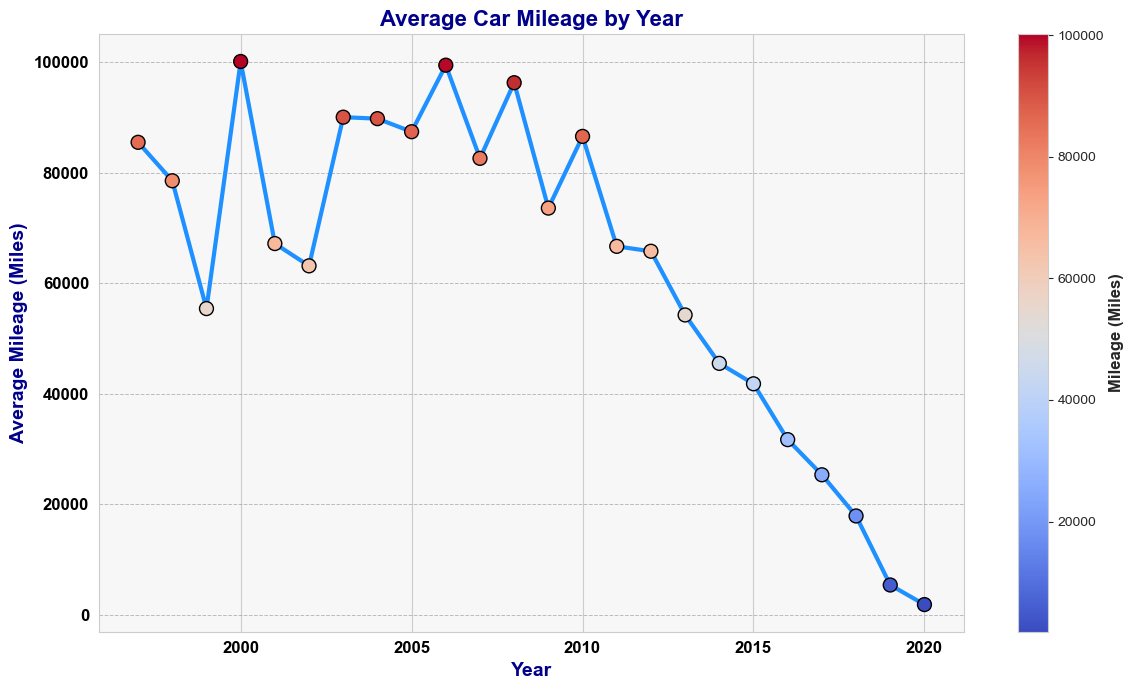

In [157]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
lineplot = sns.lineplot(
    data=mileage_and_year, 
    x='year', 
    y='mileage', 
    marker='o',  
    linewidth=3,  
    color='dodgerblue', 
    zorder=1  
)
scatter = plt.scatter(
    mileage_and_year['year'], 
    mileage_and_year['mileage'], 
    c=mileage_and_year['mileage'], 
    cmap="coolwarm", 
    s=100,
    edgecolor='black',  
    zorder=2  
)
plt.gca().patch.set_facecolor('#f7f7f7')
plt.xlabel("Year", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Average Mileage (Miles)", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Average Car Mileage by Year", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
cbar = plt.colorbar(scatter)  
cbar.set_label('Mileage (Miles)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

# Price Distribution by Transmission Type

In [42]:
Price_Distribution_by_Transmission_Type = cars_data_cleaned.groupby('transmission')['price'].mean().reset_index().sort_values(by='transmission', ascending=False)
Price_Distribution_by_Transmission_Type


,transmission,price
2,Semi-Auto,33395.991779
1,Manual,13226.032342
0,Automatic,27417.922141


C:\Users\Tarek E.Shabana\AppData\Local\Temp\ipykernel_12336\159507170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=cars_data_cleaned, palette="pastel")


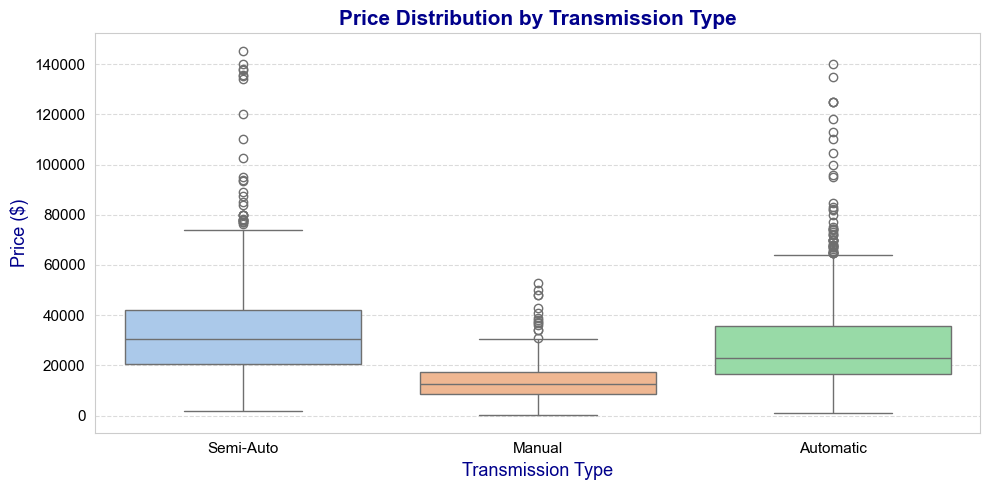

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.boxplot(x='transmission', y='price', data=cars_data_cleaned, palette="pastel")
plt.xlabel("Transmission Type", fontsize=13, color='darkblue')
plt.ylabel("Price ($)", fontsize=13, color='darkblue')
plt.title("Price Distribution by Transmission Type", fontsize=15, fontweight='bold', color='darkblue')
plt.xticks(fontsize=11, color='black')
plt.yticks(fontsize=11, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Build Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
encoder = LabelEncoder()

In [57]:
cars_data_cleaned.loc[:, 'brand'] = encoder.fit_transform(cars_data_cleaned['brand']).astype('int32')
cars_data_cleaned.loc[:, 'model'] = encoder.fit_transform(cars_data_cleaned['model']).astype('int32')
cars_data_cleaned.loc[:, 'fuelType'] = encoder.fit_transform(cars_data_cleaned['fuelType']).astype('int32')
cars_data_cleaned.loc[:, 'transmission'] = encoder.fit_transform(cars_data_cleaned['transmission']).astype('int32')

In [67]:
X = cars_data_cleaned[['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = cars_data_cleaned['price']

In [61]:
cars_data_cleaned.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,-1.190849,3,69,0.784426,2,-0.844828,0,-0.086181,-0.297304,2.2,0.518191
1,0.671093,7,30,-0.608688,1,0.937535,0,-0.330508,0.277169,2.0,-0.963320
2,-1.583004,0,58,0.784426,0,-0.806932,4,-0.086181,-0.600106,2.9,2.164349
3,-1.091564,8,71,-0.260409,0,-0.183287,0,-1.491065,0.206421,2.0,-0.640186
4,0.077193,5,70,1.132705,2,-0.871535,4,-0.086181,-0.090720,1.0,-0.396815


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# show results

In [76]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.3754645509276948
Mean Squared Error (MSE): 0.32672611925174055
Root Mean Squared Error (RMSE): 0.5715996144608047
R^2 Score: 0.6785310241703971
